###Supervised Learning

In [ ]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
df = pd.read_csv("heart_disease_reduced.csv")
print("Shape:", df.shape)
df.head()


Shape: (303, 9)


,cp_3.0,thal_7.0,restecg_2.0,exang_1.0,ca,sex_1.0,slope_2.0,cp_4.0,target
0,0,0,1,0,0,1,0,0,0
1,0,0,1,1,2,1,1,1,1
2,0,1,1,1,1,1,1,1,1
3,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0


In [ ]:
# Cell 3: Split into features and target
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (242, 8) Test shape: (61, 8)


In [ ]:
# Cell 4: Logistic Regression
from sklearn.pipeline import Pipeline

lr = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced" ))
])
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.79      0.82      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC AUC: 0.9193722943722945


In [ ]:
# Cell 5: Decision Tree
dt = DecisionTreeClassifier(random_state=42,class_weight="balanced")
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:,1]

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        33
           1       0.71      0.86      0.77        28

    accuracy                           0.77        61
   macro avg       0.78      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61

ROC AUC: 0.8398268398268397


In [ ]:
# Cell 6: Random Forest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.75      0.86      0.80        28

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC AUC: 0.900974025974026


In [ ]:
# Cell 7: Support Vector Machine (with probability enabled)
# svm = SVC(kernel="rbf", probability=True, random_state=42)
# svm.fit(X_train, y_train)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])
svm.fit(X_train, y_train)


y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:,1]

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))


SVM Results:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.76      0.89      0.82        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61

ROC AUC: 0.9291125541125541


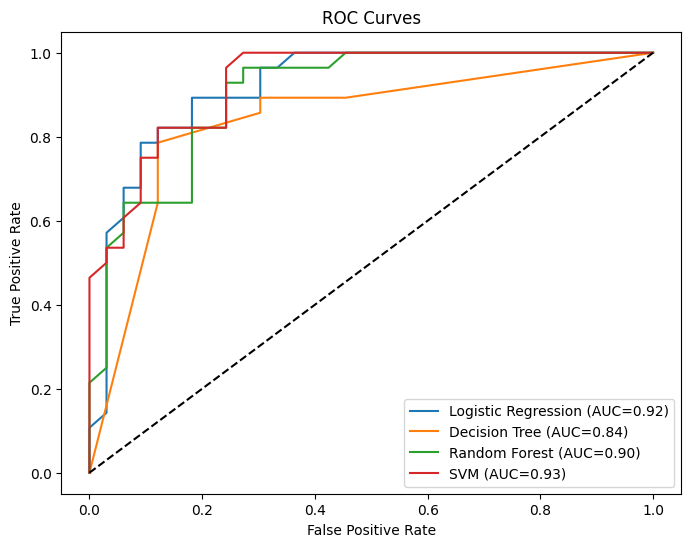

In [ ]:
# Cell 8: Plot ROC curves for all models
plt.figure(figsize=(8,6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_proba_lr):.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_auc_score(y_test, y_proba_dt):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_auc_score(y_test, y_proba_svm):.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


In [ ]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_svm)],
    "Precision": [precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_dt),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_svm)],
    "Recall": [recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_dt),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_svm)],
    "F1-score": [f1_score(y_test, y_pred_lr),
                 f1_score(y_test, y_pred_dt),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_svm)],
    "ROC AUC": [roc_auc_score(y_test, y_proba_lr),
                roc_auc_score(y_test, y_proba_dt),
                roc_auc_score(y_test, y_proba_rf),
                roc_auc_score(y_test, y_proba_svm)]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision    Recall  F1-score   ROC AUC
0  Logistic Regression  0.819672   0.793103  0.821429  0.807018  0.919372
1        Decision Tree  0.770492   0.705882  0.857143  0.774194  0.839827
2        Random Forest  0.803279   0.750000  0.857143  0.800000  0.900974
3                  SVM  0.819672   0.757576  0.892857  0.819672  0.929113


In [ ]:
# before tuning
baseline_preds = {
    "rf": (y_pred_rf, y_proba_rf),
    "svm": (y_pred_svm, y_proba_svm),
    "lr": (y_pred_lr, y_proba_lr),
    "dt": (y_pred_dt, y_proba_dt)
}


The classification models achieved accuracies between 77% and 82%, with ROC AUC values ranging from 0.84 to 0.93. SVM performed the best overall (Accuracy = 82%, AUC = 0.93), followed by Logistic Regression. These results align with literature benchmarks for the Cleveland dataset, which typically report accuracies in the 70–85% range. Models with higher recall (Decision Tree, Random Forest, SVM) are particularly valuable for detecting patients with heart disease.

The base SVM achieved the highest ROC AUC (0.929), indicating slightly stronger class separation. However, the optimized SVM achieved higher accuracy (0.869) and F1-score (0.862), making it more effective at practical classification. Therefore, we selected the optimized SVM as the final model for deployment.